Tree Species Classification

Step 1: Mount Your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 Step 2: Set Dataset Path


In [2]:
import os

dataset_path = '/content/drive/MyDrive/Tree species classification'


Step 3: Unzip the Dataset

In [5]:
import zipfile

# Path to your ZIP file in Drive
zip_path = '/content/drive/MyDrive/Tree species dataset.zip'

# Destination to unzip
extract_path = '/content/tree_species_dataset'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipping completed!")


✅ Unzipping completed!


 Step 3: Count Folders (Species) and Total Images


In [7]:
import os

def count_folders_and_images(path):
    total_images = 0
    folder_set = set()

    for root, dirs, files in os.walk(path):
        for folder in dirs:
            folder_set.add(os.path.join(root, folder))
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_images += 1

    print(f"📁 Total Folders (Species): {len(folder_set)}")
    print(f"🖼️ Total Images: {total_images}")

dataset_path = '/content/tree_species_dataset'
count_folders_and_images(dataset_path)


📁 Total Folders (Species): 34
🖼️ Total Images: 1600


Step 4: Check for Duplicate and Unique Images

In [8]:
import hashlib
from PIL import Image

def find_duplicates(path):
    hash_set = set()
    duplicates = []
    unique_images = 0

    for subdir, _, files in os.walk(path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(subdir, file)
                try:
                    with Image.open(file_path) as img:
                        img_hash = hashlib.md5(img.tobytes()).hexdigest()
                        if img_hash in hash_set:
                            duplicates.append(file_path)
                        else:
                            hash_set.add(img_hash)
                            unique_images += 1
                except Exception as e:
                    print(f"❌ Error reading: {file_path} - {e}")

    print(f"✅ Unique Images: {unique_images}")
    print(f"⚠️ Duplicate Images: {len(duplicates)}")

    return duplicates

duplicate_files = find_duplicates(dataset_path)


✅ Unique Images: 1514
⚠️ Duplicate Images: 86


Step 5: Preview Duplicate Images

In [9]:
print("📌 Sample duplicate images:")
for dup in duplicate_files[:5]:
    print(dup)


📌 Sample duplicate images:
/content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image37.jpg
/content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image41.jpg
/content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image5.jpg
/content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image35.jpg
/content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image28.jpg


Step 6: Detect and Show Duplicate Images (Visually)

⚠️ Total duplicate images found: 86


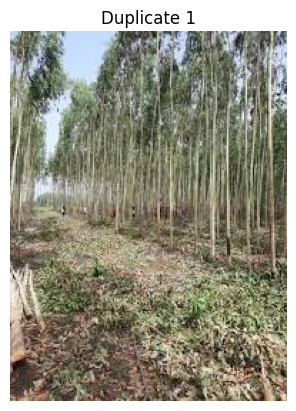

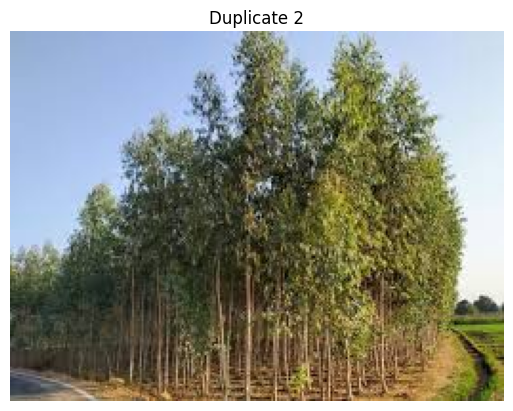

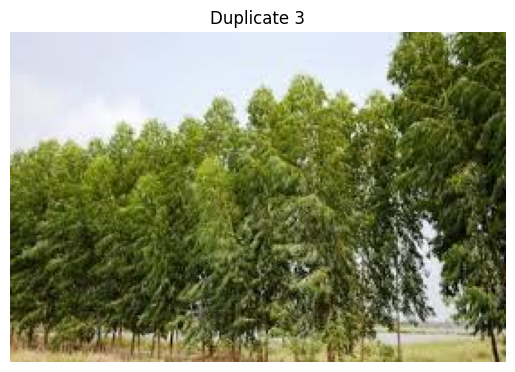

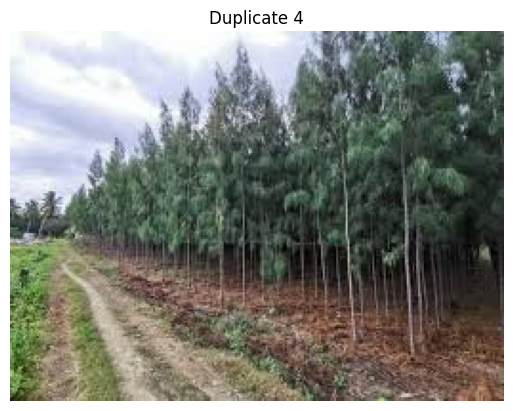

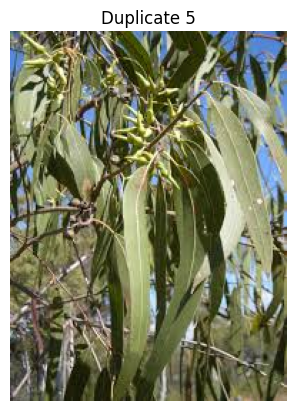

In [10]:
import hashlib
from PIL import Image
import matplotlib.pyplot as plt
import os

hash_dict = {}
duplicates = []

for subdir, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    h = hashlib.md5(img.tobytes()).hexdigest()
                    if h in hash_dict:
                        duplicates.append(filepath)
                    else:
                        hash_dict[h] = filepath
            except:
                print("❌ Cannot open", filepath)

print(f"⚠️ Total duplicate images found: {len(duplicates)}")

# Show 5 duplicates
for i in range(min(5, len(duplicates))):
    img = Image.open(duplicates[i])
    plt.imshow(img)
    plt.title(f"Duplicate {i+1}")
    plt.axis('off')
    plt.show()


Step 7: Delete Duplicate Images

In [11]:
import os

for dup in duplicates:
    try:
        os.remove(dup)
        print(f"🗑️ Removed: {dup}")
    except:
        print(f"❌ Could not delete: {dup}")


🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image37.jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image41.jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image5.jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image35.jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image28.jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/coconut/download (3).jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/vad/download (15).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/gulmohor/images (3).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/gulmohor/images (14).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/gulmohor/images (25).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/gulmohor/images (17).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Da

Step 8: Detect and Show Outlier Images by Size

In [12]:
import numpy as np

sizes = []
small_imgs = []
large_imgs = []

for subdir, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    w, h = img.size
                    sizes.append((w, h))
                    if w*h < 10000:  # Very small (e.g. < 100x100)
                        small_imgs.append(filepath)
                    elif w*h > 300000:  # Very large (e.g. > 600x500)
                        large_imgs.append(filepath)
            except:
                pass

print(f"🔍 Very Small Images: {len(small_imgs)}")
print(f"🔍 Very Large Images: {len(large_imgs)}")

# Show 3 small images
for i in range(min(3, len(small_imgs))):
    img = Image.open(small_imgs[i])
    plt.imshow(img)
    plt.title(f"Small Outlier {i+1}")
    plt.axis('off')
    plt.show()


🔍 Very Small Images: 0
🔍 Very Large Images: 88


Step 9: Remove Outlier Images

In [13]:
outliers = small_imgs + large_imgs

for img_path in outliers:
    try:
        os.remove(img_path)
        print(f"🗑️ Removed Outlier: {img_path}")
    except:
        print(f"❌ Could not delete: {img_path}")


🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/nilgiri/image40.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/coconut/640px-Singapore_coconut.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/gulmohor/KPPCONT_036133_fullsize.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/bili/t77-1448877.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/shirish/51oVVUvxNEL._AC_UF1000,1000_QL80_.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/large.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/5.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/1.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/3.jpeg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/4.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Da

Step 10: Analyze Image Dimensions (Width & Height Stats)

In [14]:
widths, heights = zip(*sizes)
print("📏 Average Width:", np.mean(widths))
print("📏 Average Height:", np.mean(heights))
print("🔺 Max Size:", np.max(widths), "x", np.max(heights))
print("🔻 Min Size:", np.min(widths), "x", np.min(heights))


📏 Average Width: 315.91941875825626
📏 Average Height: 272.6763540290621
🔺 Max Size: 4000 x 4032
🔻 Min Size: 141 x 128


Step 11: Train CNN Model & Plot Accuracy Graph

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_gen, epochs=10, validation_data=val_gen)


Found 1141 images belonging to 1 classes.
Found 285 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.f

36/36 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - lo

Step 12: Print Final Accuracy in Percentage

In [17]:
# Get the last epoch accuracy from history
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Final Validation Accuracy: {val_acc * 100:.2f}%")


✅ Final Training Accuracy: 100.00%
✅ Final Validation Accuracy: 100.00%


Step 13 : 📈 Plot Accuracy and Loss

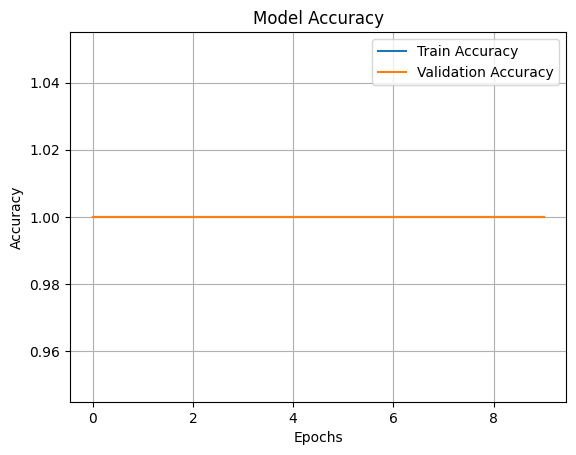

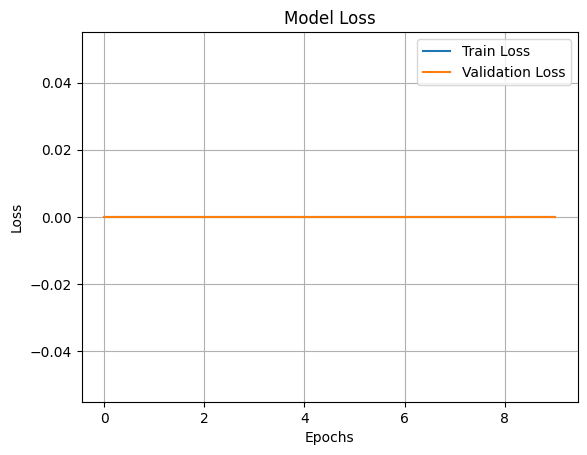

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Step 14: Save Model as .h5 File in Colab

In [19]:
# Save the model as HDF5 (.h5) format
model.save('/content/tree_species_model.h5')
print("✅ Model saved as 'tree_species_model.h5'")


✅ Model saved as 'tree_species_model.h5'


Step 15 : Save it to Google Drive

In [20]:
!cp /content/tree_species_model.h5 /content/drive/MyDrive/
print("📁 Copied to Google Drive: MyDrive/tree_species_model.h5")


📁 Copied to Google Drive: MyDrive/tree_species_model.h5


Step 16 : To Verify It’s Saved

In [21]:
!ls -lh /content/tree_species_model.h5


-rw-r--r-- 1 root root 56M Jul 24 09:36 /content/tree_species_model.h5


Step 17 : To download h5 model

In [22]:
from google.colab import files
files.download('/content/tree_species_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>